In [1]:
import math

In [2]:
def sigmoid(weight:float,bias:float,data_point:float)->float:
    # Z is nothing but equation of linear regression
    z = weight*data_point + bias
    
    u = 1 + (math.exp(-z))
    
    p = 1/u
    return p

In [64]:
def gradient_descent(x:list,y:list,iterations:int=50000,learning_rate:float=0.001):
    
    # Start with current weight and bias as zero
    current_weight , current_bias = 0,0
    # lenght of the list/array
    n = len(x)
    for _ in range(iterations):
        # initialize gradients as 0 
        weight_gradient,bias_gradient = 0,0
        
        for i in range(n):
            
            # Logistic regression calculates output based on sigmoid function
            # value of p is determined by sigmoid function
            p = sigmoid(current_weight,current_bias,x[i])
            
            # updating weight and bias gradients
            weight_gradient += (x[i] *(p - y[i]))/n
            bias_gradient += (p - y[i])/n

        #Updating weight and bias using Update rule 
        current_weight -= weight_gradient*learning_rate
        current_bias -= bias_gradient*learning_rate

    return current_weight , current_bias

In [65]:
x_train = [10,5,4,3,11,8,7,12]
y_train = [1,0,0,0,1,1,0,1]

weight, bias = gradient_descent(x_train,y_train,iterations=100000)
print(f" Optimised Weight : {weight} and \n Optimised Bias : {bias}")

 Optimised Weight : 0.8115979396263403 and 
 Optimised Bias : -5.832803445721476


In [66]:
# Lets test our sigmoid function using updated weight and bias
# lets check what value it gives for datapoint 5
data_point=5
prediction = sigmoid(weight,bias,data_point)
print(f"Prediction : {prediction}")

Prediction : 0.14494471329227648


In [67]:
prediction_array = list()

for i in range(16):
    data_point=i
    prediction = sigmoid(weight,bias,data_point)
    prediction_array.append(prediction)


In [68]:
prediction_array

[0.002921292820769831,
 0.006553340144092465,
 0.014634836242365461,
 0.032357726710745306,
 0.07001807762122252,
 0.14494471329227648,
 0.27623479874776896,
 0.4621679786368354,
 0.659255911728744,
 0.8132971174373711,
 0.907474060543293,
 0.9566766576769807,
 0.9802832267594022,
 0.9911458003906191,
 0.9960479765380663,
 0.9982408531725875]

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

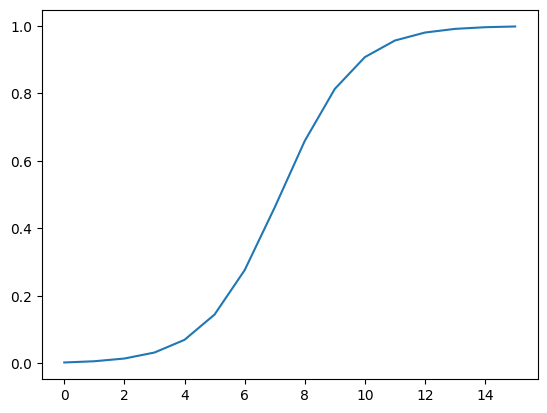

In [70]:
sns.lineplot(x=[i for i in range(16)] , y = prediction_array)
plt.show()

In [71]:
class logisticRegression:

    def __init__(self):
        self.weight = 0
        self.bias = 0

    def fit(self,X_train:list , y_train:list):
        self.weight ,self.bias = gradient_descent(X_train, y_train,iterations =100000)

    def predict(self ,x_test:list)->list:
        prediction_list = [ ]

        for i in x_test:
            prediction = sigmoid(self.weight , self.bias , i)
            if prediction <= 0.5:
                prediction_list.append(0)
            else:
                prediction_list.append(1)
        return prediction_list

In [72]:
x_train = [10,5,4,3,11,8,7,12]
y_train = [1,0,0,0,1,1,0,1]

model = logisticRegression()
model.fit(x_train,y_train)

In [73]:
x_test = [1,2,5,9,7,11,15]
prediction = model.predict(x_test)
print(prediction)

[0, 0, 0, 1, 0, 1, 1]


In [74]:
x_test = [11,15 , 9, 3, 4]
prediction = model.predict(x_test)
print(prediction)

[1, 1, 1, 0, 0]
